# Libraries

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud 

# Gráficos GPT

In [11]:
# Read data
df_gpt_results = pd.read_csv("./results-gpt/sentiment_gpt_data.csv")
df_gpt_results['date'] = pd.to_datetime(df_gpt_results['date']).dt.date

df_bitcoin = pd.read_csv("./data/bitcoin.csv")
df_bitcoin['date'] = pd.to_datetime(df_bitcoin['date']).dt.date

In [3]:
#Check data
df_gpt_results

,date,clean_tweet,sentiment
0,2013-06-28,taking action will be a 7 day grace period fo...,POSITIVE
1,2013-05-25,am not suggesting shutting down co2 production...,POSITIVE
2,2013-05-03,guaranteeing the world s best resale value in ...,POSITIVE
3,2013-05-03,yes this does put an indirect floor on resale...,POSITIVE
4,2013-05-03,tesla raises model s resale value guarantee to...,POSITIVE
...,...,...,...
256,2021-02-04,no highs no lows only doge,POSITIVE
257,2021-02-04,dogecoin is the people s crypto,POSITIVE
258,2021-02-04,doge,NEUTRAL
259,2021-01-29,tanstaafl would be better to have small fees ...,POSITIVE


In [12]:
#Check data
df_bitcoin

,date,bitcoin_price,stonks
0,2010-07-19,0.0858,0
1,2010-07-20,0.0808,-1
2,2010-07-21,0.0747,-1
3,2010-07-22,0.0792,1
4,2010-07-23,0.0505,-1
...,...,...,...
4342,2022-07-04,19115.5200,-1
4343,2022-07-05,19129.0000,1
4344,2022-07-06,20205.6075,1
4345,2022-07-07,19930.8450,-1


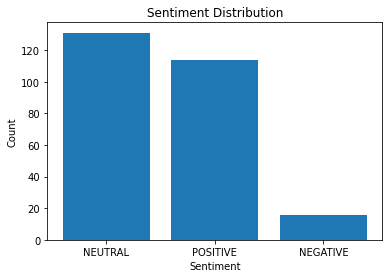

In [6]:
# Plot sentiment distribution (bar)
sentiment_counts = df_gpt_results['sentiment'].value_counts()

plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

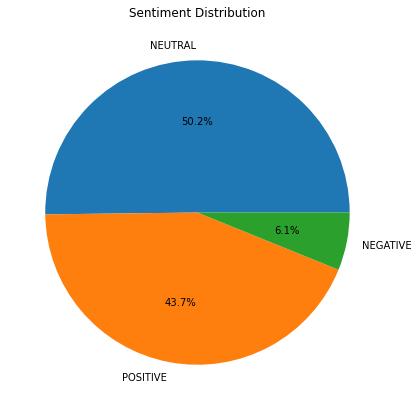

In [7]:
# Plot sentiment distribution (pie)
sentiment_counts = df_gpt_results['sentiment'].value_counts()

fig = plt.figure(figsize=(10, 7))
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title('Sentiment Distribution')
plt.show()

<ipython-input-13-dfd2b2de0f54>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a.sort_values('date', inplace=True)


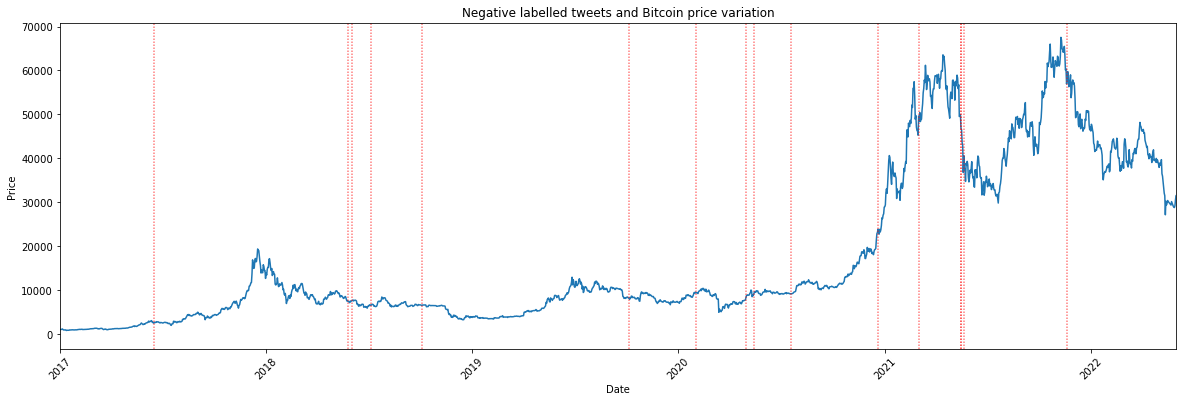

In [13]:
# Historic Price of Bitcoin over time and Negative tweets

a = df_gpt_results[df_gpt_results['sentiment'] == 'NEGATIVE']
a.sort_values('date', inplace=True)

# Create a line graph
plt.figure(figsize=(20, 6))
plt.plot(df_bitcoin['date'], df_bitcoin['bitcoin_price'])

# Customize the plot
plt.title('Negative labelled tweets and Bitcoin price variation')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)

legend_labels = []
# Add vertical lines for each negative tweet
for date in a['date']:
    plt.axvline(date, color='red', linestyle=(0, (1, 1)), alpha=0.5)


# Set the x-axis limits to the desired date range
start_date = pd.to_datetime("2017-01-01") 
end_date = pd.to_datetime("2022-06-01")
plt.xlim(start_date, end_date)

# Display the graph
plt.show()


In [14]:
#Tweets that can influence:
print( str(a.iloc[12]['date']) +  ' : "' + a.iloc[12]['clean_tweet'] + '"')
print( str(a.iloc[13]['date']) +  ' : "' + a.iloc[13]['clean_tweet'] + '"')
print( str(a.iloc[14]['date']) +  ' : "' + a.iloc[14]['clean_tweet'] + '"')

2021-05-16 : "bitcoin is actually highly centralized  with supermajority controlled by handful of big mining  aka hashing  companies  a single coal mine in xinjiang flooded  almost killing miners  and bitcoin hash rate dropped 35   sound  decentralized  to you "
2021-05-16 : "obnoxious threads like this make me want to go all in on doge"
2021-05-21 : "bitcoin hashing  aka mining  energy usage is starting to exceed that of medium sized countries  almost impossible for small hashers to succeed without those massive economies of scale "


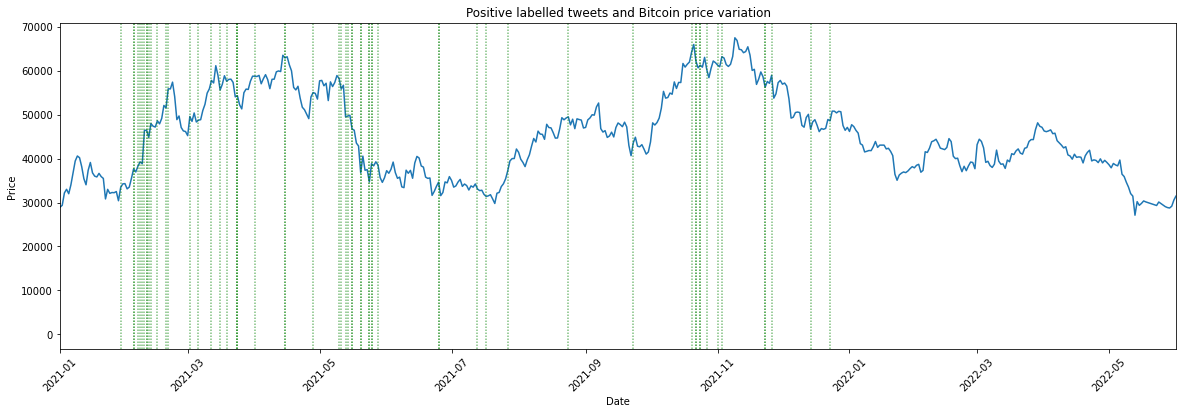

In [15]:
# Historic Price of Bitcoin over time and Positive tweets

a = df_gpt_results[df_gpt_results['sentiment'] == 'POSITIVE']

# Create a line graph
plt.figure(figsize=(20, 6))
plt.plot(df_bitcoin['date'], df_bitcoin['bitcoin_price'])

# Customize the plot
plt.title('Positive labelled tweets and Bitcoin price variation')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)

# Add vertical lines for each positive tweet
for date in a['date']:
    plt.axvline(date, color='green', linestyle=(0, (1, 1)), alpha=0.5)

# Set the x-axis limits to the desired date range
start_date = pd.to_datetime("2021-01-01")
end_date = pd.to_datetime("2022-06-01")
plt.xlim(start_date, end_date)

# Display the graph
plt.show()

In [16]:
# Map sentiment to numeric values
sentiment_mapping = {'POSITIVE': 1, 'NEGATIVE': -1, 'NEUTRAL': 0}
df_gpt_results['sentiment_encoded'] = df_gpt_results['sentiment'].map(sentiment_mapping)

In [17]:
# Group by date and sum the sentiment values
grouped_data = df_gpt_results.groupby(['date']).agg({'sentiment_encoded': 'sum'}).reset_index()

# Rename the 'sentiment_encoded' column to 'sentiment_sum'
grouped_data = grouped_data.rename(columns={'sentiment_encoded': 'sentiment_sum'})
grouped_data

,date,sentiment_sum
0,2013-02-27,0
1,2013-05-03,4
2,2013-05-25,1
3,2013-06-28,1
4,2014-01-23,0
...,...,...
183,2021-11-26,1
184,2021-11-27,0
185,2021-12-14,1
186,2021-12-23,1


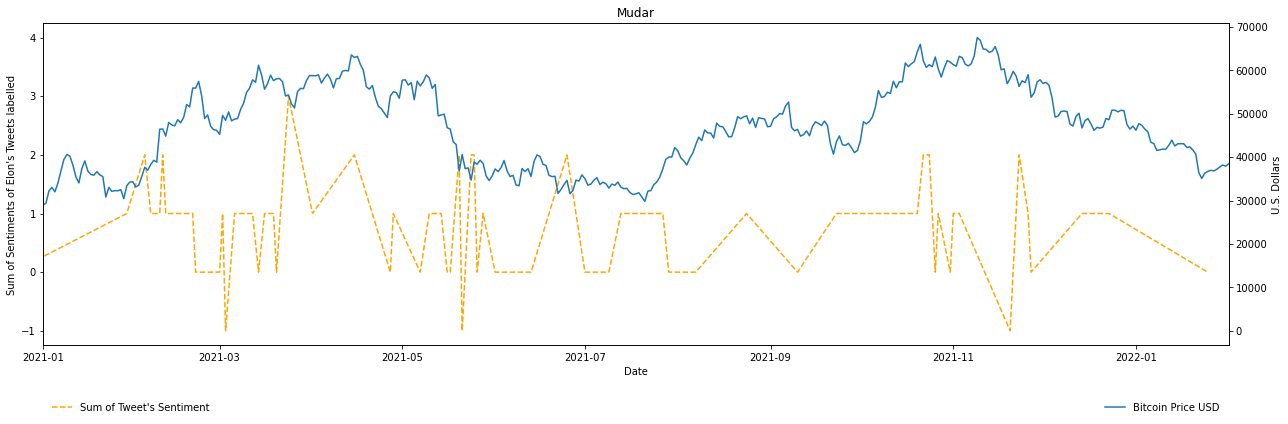

In [18]:
# Plot the sentiment sum over time

fig, ax1 = plt.subplots(figsize=(18, 6))

# Plot the scatter points
ax1.scatter(grouped_data['date'], grouped_data['sentiment_sum'], color='orange',s=0 , marker='s')

# Connect the dots with a line
ax1.plot(grouped_data['date'], grouped_data['sentiment_sum'], label='Sum of Tweet\'s Sentiment', linestyle='--', color='orange')

ax1.set_xlabel('Date')
ax1.set_ylabel('Sum of Sentiments of Elon\'s Tweets labelled')
ax1.set_title('Mudar')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot the line graph on the second y-axis
ax2.plot(df_bitcoin['date'], df_bitcoin['bitcoin_price'], linestyle='-', label='Bitcoin Price USD')
ax2.set_ylabel('U.S. Dollars')

# Show legend for both axes
ax1.legend(loc='upper left', bbox_to_anchor=(0, -0.15), frameon=False)
ax2.legend(loc='upper right', bbox_to_anchor=(1, -0.15), frameon=False)

# Set the x-axis limits to the desired date range
start_date = pd.to_datetime("2021-01-01")  
end_date = pd.to_datetime("2022-02-01") 
ax1.set_xlim(start_date, end_date)


plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


## WordCLouds

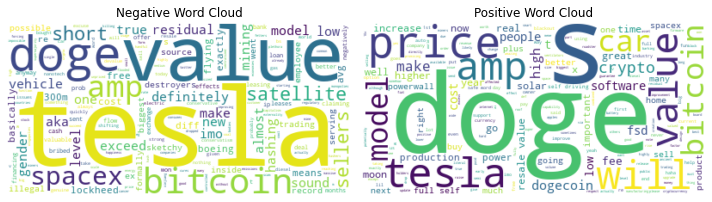

In [22]:
data = pd.read_csv('./results-gpt/sentiment_gpt_data.csv')

# Retrieve negative and positive tweets from the 'data' DataFrame
negative_tweets = data[data['sentiment'] == 'NEGATIVE']['clean_tweet'].tolist()
positive_tweets = data[data['sentiment'] == 'POSITIVE']['clean_tweet'].tolist()

# Join all negative tweets into a single string
negative_text = ' '.join(negative_tweets)

# Create a WordCloud object for negative tweets
negative_wordcloud = WordCloud(background_color='white').generate(negative_text)

# Join all positive tweets into a single string
positive_text = ' '.join(positive_tweets)

# Create a WordCloud object for positive tweets
positive_wordcloud = WordCloud(background_color='white').generate(positive_text)

# Display the generated word clouds using matplotlib
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(negative_wordcloud, interpolation='bilinear')
axes[0].set_title('Negative Word Cloud')
axes[0].axis('off')

axes[1].imshow(positive_wordcloud, interpolation='bilinear')
axes[1].set_title('Positive Word Cloud')
axes[1].axis('off')

plt.tight_layout()
plt.show()
